<a href="https://colab.research.google.com/github/fmbento/Jupyter-Notebooks_ad-hoc-solutions/blob/main/Transcri%C3%A7%C3%A3o_de_Videos_ou_Audios_com_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transcrição de Vídeos ou Áudios com IA
### Optimizado para o Google Colab
<br>
Última revisão: <br>
28 Janeiro 2024 -- uso do **Faster-Whisper** em vez do Whisper (MUITO mais rápido)
<br><br>


### Na primeira execução vai aparecer este alerta:

<center>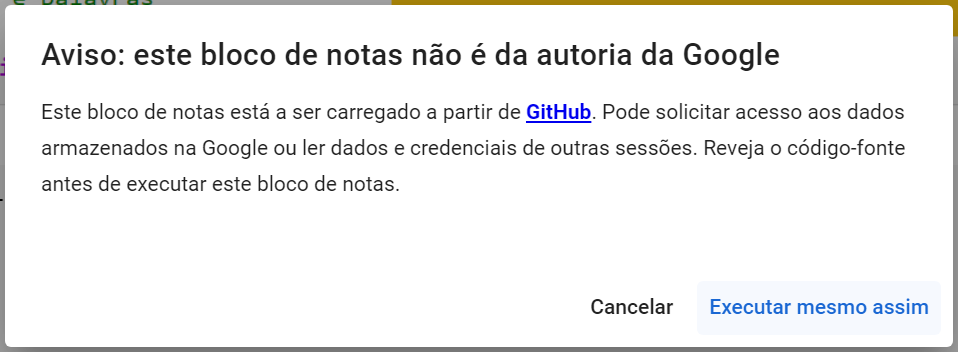</center>

Este notebook é seguro e pode escolher "Executar mesmo assim".


**Nota**: para o primeiro ficheiro vai demorar alguns 2 ou 3 minutos a mais (no Passo 2), pois na primeira execução precisa de fazer o download do modelo, 3.09 GB.



# Início:

In [1]:
#@title Passo 0: Instala as bibliotecas Python necessárias

#@markdown Só é necessário correr esta célula para o primeiro ficheiro, na sessão atual. Tempo de Execução necessário: aprox/ 1 minuto.

#@markdown NOTA: Se fechar esta página e não a abrir dentro de 10 a 15 minutos, todos os ficheiros e parametrizações serão apagados.

#@markdown Verificar se o Tempo de Execução está como T4 (GPU NVidia Tesla T4):

#@markdown ![Captura de ecrã 2025-05-27 125734.png](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAjIAAADsCAYAAABuZ0wvAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAFkISURBVHhe7Z0JeBTF1oa/7HsggQAie9hRBFlUxIuKoKKoKK4oKK6oqCiKiiLyi9sVFVBB1ChyVcSFqygqXBAUFEFF9jUsYc9K9mSyzF9fpSsO42TPJBly3uepZ2a6q6urqnu6vj7nVLeXXQFBEARBEAQPxNv6FARBEARB8DhEyAiCIAiC4LGIkBEEQRAEwWMRISMIgiAIgsciQkYQBEEQBI9FhIwgCIIgCB6LCBlBEARBEDwWeY6MINRxcguAxBwgS33yu0kF8s+tcXy8gACfv1OwSo0Di74LglA7iJARhDpIZj6QkA0k5SoBo74LdZtgX6BRABAVBISo74Ig1BwiZAShDkHRsj+jyAIjeCa00LQJA4LESiMINYIIGUGoA9BVtC8diBcBc9LQLAhorQSNv0QiCoJbESEjCLVMSi6w7bjEvJyMMKamS0MgIsBaIAhCtSNCRhBqkcOZQGy69UM4aenYAGgaZP0QhDpI8tGjOhXm5wG+6sYqPxNBQd44eCweS776AV42oNsZ3XHxFUMR1KAh/EOUQq8jiJARhFqA/zoKmCNZ1gLhpKdVKNBaJUGoK2RnZmDHxvXYsWkLAvwCYC+0I6RhGELCwlBYmK1y5OHYwX3YtG4DMlPSEdW4Edq0b4uj8Yfg51eINl3ORP9LhiM8MqqowFpChIwg1AIUMLvTrB9CvaF9OHBKsPVDEGqJnKxMrP35R+zbtgEp6eno0qkbDscdgZe3NwKDghAZ1RhNIsKRl5uJrX/9ivjD8cjLykfTJkqweNvRou2pCAoNQnpGJn799Te07nomho26B42imlp7qFlEyAhCDZNqAzYlA/LHq394qXR6JNDAv+i3INQ0acdTMHHsnWjZ4lRENghHcHAwCvPyEOTjh9zsHKSmZyArMxsNggPQqGEYUtISEOAXjPzcQiWAsuDv740wJXIKfIDMLJVXiZms3Fz4h0Vh+D3j0KJ1W2tPNYcIGUGoQTg7aX0ikCf/unqLn1IzPRvLQ/SEmictJRkzpj6Ngwfj0O200xC//yASDh9Bu5Yt0PO00xHRJBL5BYXIU8IkJDAIocFBSFTCx88/ALm5+Ug/noYCWy7s9nz4+xSqzzwUFBQgR6VN23fhUHIanpn5Llq0jbb2WDOIkBFODmwZSM6wWT8c8A9FZGjduf3dnAykuKimUL+IUKfkaZHWD0GoAZKOHcWyhZ9g1epV8PbyQUhoCBIPHUOgly+uveoqtIlui4aNI+Hj44PCvAL4+/vDx8tLiRQKFruOp0mNT1QixwZ7fh587LkICvSFl8qTlZ2JzTt3YclPq3A8Nw+vzluA5i1bW3t2PyJkhJMC29KJuGza79YvB1qMxnvvXo9W1s/ahC6ljUrICALp7hEupoPq7r0FWrSwfgoeSU52Nn7+5kv8/utP2LJ1O/r06YsjR4/h6IGj6Nq+E0aNuhWRLZrBKyAAXvBBQX4+fL19lEBQGwf6K7Fihz07C7lpqbBn5cK7sBDesMGrIF+JmkLk5GTCpvKu37EdX3yzCM3atcZjz09HUHBIUQXcjDyqSTgp4B/SJSnHkGJ9rW32yjRrwQE+ALHuE4utW62vgkdSqETHrOmvw8degLCwEHTv3h02W776Ho6WbVqjfYeOWnB4BQTDOzgMXqGh8A4NQ2FAIOxBQbD7ecHuAxR42+ET4Ae/QCYf+KpPb39f+KplQQ0jENGoKXqc0Qv9zz0HPl4FeOPFybCrfdcEImQEzyM5Gc6GjQPHDurPiKvewtLvf8DSd0ajJRdkqrsOJ1eOTW1f096dhBwgPc/6IQiKNHU+8F1adZrYrfhovSgZT2bxD0uw8c8/sXnzZmzZvg3hDRugcdMmCFAipWGjBrCjAL6+figsKNTxLoU5OcjLztKxMAXquz09FfaMNNgzM+GdnYOC3Czk5mchT11FC73zdbyM3dsHhT4+CAwKQbdu3dAsqglit2/FD4u+tmrhXkTICB5GMr6ZciOuHzoSY2esQJzNhuSNn+JLy6vUtGVE0ZeWLVEUbrYN38SsU2LGhrhfPsUzd1yOy256CO/G6pU1RpK8ekBwQV0/LxLWLMHKRYtQw38XoZrIUOLjnQ/motmpp6KFuiZ26tQJTZtGIS8vB2lpKbCp62JIg3CkpqbAO0+paiVakJUGfyVWfDJSUZiSBK+0bNjiU5CXkIrsxOMozMhV62xIPRyP1GNJOJ6UjIP79iMhLQ3w84O9sACZSvjk5ufh7dlvICvL/Q/LEiEjeBQZS6dh+nb1Je8Yti9+AbdfMRTXPxaDjZlF65tFmAjKpojQmiYT2//7FG5R+W6fEoNfDtIscgwLZ37zD6uOuyi0K/lV1++8PYW8LXj+/sfxr8nf4YhesAGTb1e/Z2/Qv/75u27D11PU3SjFrYiZtR44GIOYNdYiwaP4+IsvcejQIT3FuqG6IPY4o4d+7EOaEh22XBsaRUYi9Xgytm7djJT4BNhz8lCYmasES6oSKglIP5KIpENHkJGohExWNnzUxl7qhC1UKcDHH4W5eTiekIgMVV5QgL8SMOlISE7Gztg92BsXhz27d+DLTz8pqowbESEjeBAb8O7sItNLSLve6NzUT38nEd1H45WPF2FiP2sBonHv3E8w45FBaFmczQ8tz+ld5HLaHoPpv2Tope6GLiW3vEcpLx7rly7E8+/Nwehxz+Eqx/ThlqI8iasw3mndzVNj8PznK7A+sSq+rnh8NlEJBooGx3T3NExeHYdq0W2pe/Dz2j+w/gifMGqRlYKj/JmYUWNC1J3YCpU4z7d+1DESPp+CWdpjm4uPJsagyHnrDhKwZMoN6N+pDdq0YeqOgTdMwZIEa7UbyV05EQP73ICYcpucDuKjG/pg4PiVqOvPs+QlZ+OWbfD180N6RgbyCvKRkZ2NzTt2YtP27UhUgiPuwAFs27EDKampyMnIQn5uPnLUn7dAXSsDgsPhHxpW9MIwX28dI5NdmIes/BwtgrIzcpCfb0d4w4aIbBSOAlsm8rPTUJCnhJAqJM+WjwKVb9n33+tZT+5EhIzgMeyePQ3f0vISMgCPvj4VM+d+g2/feQZjJr2LBS9fjzMinaaA+Eeiy6DxiHlX5XnkdXz69TeIeWYqHhzCSPpM/DItRkkj9+MOa0x67ELcc/+reHD+b/j+lz3YnaYGdseUZY2Oeek46rQubs9OfP/d93hwwtO4TgmeKsWcBkWhf7+uuESnjuganIDlMW9hzNJ4K0MViF2BiW9/hmnrHWrYoD9mzJ6Ib1+7Ft2sRZ5OYl10L8XGYNR4BzNM7BTcVf7RvgLEImZIH1W22tfZYzB1zkxMGh6NtDUxuGvgWKx0s1pIS4hFbMJWxJZ7PwnYujUBsQcTqkesu5EDBw5i//79iD92DLF7YrVw2aN+/77pL6RmZSLLZkOuEiKJ6pqwd/9BJCUrMZOZjcL8XBQosZJrz0a+tw1hIaEIDQlBSHAQgoMD4evjCx9fX4SGN0CISnZ/JXIKcpCVnoy8zFQUZGYgPSkFgb7+KgVg+7Zd2LXbvc5JETKCZ5D8Dab/95j+6tcyGuZB2P4t++HqftrGguTf38PYUZdj0CUXq3Q5Rk9bURTo21TlGdQFRuc0jY5W9xuKzG8xPeaAXuZOMqs7yPfId3jw+d+wlVrFNwJ9i4WEQ+psxQoFt8KlLtb3bearVx9dOQ/Xz95S+Ytyg64Ye/tIPKnTaMx+7S4MD1eic8Vv2G9lUWoK6XE78PPaHdifVUpn5GVj//Yt2JVq/S4JvzCE/W2MKwG2Lw9JsVvw8/bDrgOt1f6OcP2mPThSHfWqJNV+flSVtJUYO2wKnEN8t04ZhrFLqldZ5C56CVPUjlqMWYxVcydgxOChGP3KQiybOUDVYxGmfO4+OxCJGj4f+/ZtxNSe1oIy6YmpG/dh3/zhqN23C5XN/1YsR2TDhujZuzcCGzbArj17ELtzJ3JSjqPAXgg/JUoOH01EQmIyUo6nIFUlmy0H/gH+8PbzRmhYKELCQuCl/ms+6ndeQQHybHmwZSuhY8tHRnoKEhOPIDfLhkD/IDRSef3seQj284G3vQAZqckIVmV55duwcdMmq1buQZ4jI3gIydgQMxFPLNijhidFRHeMeW4qro4uUicZvzyPm6eshBUq8zftRuO9t8xzZI5i9QuPYfLKIkGEppfh+dceQB83P5jsz0Q1WFWb+yAFX019CdP2qK8tz8W8iUPRusxB3TX7l07H7fOPwIZQ3PTMU7inQg/boWvpVczEAHw69VKcYi0lP7/xOCau74h/vzcaZynRdc/klUWiy9CsF6ZPvBY99TuHGNPyCXb36YrQ9Vt1vlbXPIx/431c/8WJE+cvvO9FTD7Teb9F2y/vcyN+uucMlcsqb8AAdF2/Et8Xj7uhGP7oI3igc9ErqNP//BC3vLn1BPdUZKfLMf2x/ih6jJfrev1nSBO9tjqhKOvRyPpRy+TGfoRRwyZiTSl6peeYhZg7oSeUXq0iuVg0qhPGrozGpFXLMLqsZ9WkrUfM+LF4aclBLbyjBk/CnFdGoycrcjAGA/tPQezgCZiKjzBF5wlQdZ2POcO3YuINE4tcVQFdMXrufEw6u6j2B2MGov+UWAyduw8zBxxEzMD+mHJwBKZOTcCsiUtwUO0ooOtozJ0/CUWbKJHXZhQWRU/CqmWjUZcfr3PnmHsQGBSOfG9v7Nm6AZ2bRyFfiY/cvFzY/PyQk1eAhMPJCPFT/dT1NFwz9Eo0a9IYjRo3hrcPp23n61lM2emp8IEXctIy4K22OX78uFqXBz9/HwSHBSM9LRPHU5OU0MlFWKA/cvMLMO/r/2LZqjVoEBqJxi3aoedFg/HM009ZNat+xCIjeAiROGP0LPznucuKYl5SNmLWzCXWQBSL+W+7EDFkTwxmrSiabG1bOrNYxDQd8AzmzXW/iCGMg6g2EtfgK4oYNYQ/Mu5EEZOblY6k1NKTo+Wl9aCRGNuO3zLw/eo4vazKZP2BZQzGbnmKEo9xmP2aEjENuuPfr/4ffnrv/zBvdDuEHv0DLyw+cX9x6/bAf9CNmPfqA3imZxgie16OqRcVyaPInpdg6t3XYkQFnnoet3IldvdkeRMx7+6uaKba+Pm8FUUBwnlq/0rEZLQbgPdmv4ifZk/A9IuikLzjG7y91iEeR+FcL3dQredHZcmNxZLxA9FpYOkihqyfNQzdB47H51ur6l5JQII2uHRFdJmKIBYxNwxTAgUYMGkm5kwdjoAlUzDsrs9VKQ4smYXPW4zBzJljlPDI1XXtM3AWMKZomxa5WxEz6iWst7K7JPcjTJwVrjaZiUmDWyB3awxGvVTqFnWSVCU4GBuTkpKO8AaNsOHPjbjjxlHo1KIVMlPTYC/wUqKDYgXo0+ssNGkWBR8lTnJys3DgQBx+/30d/vvVl/h4wcd4e/YsrFz+I3bu3K1Eji9SM7Ow7/BhfL34e7z9wVx88tlC/PLbOixfvgK7du5Qf//mCPLxRmiAL1qf2hy7Y8W1JAjFRPZ+AJNvtq56TSOVvFEkb8MGy8jiim0bt+lP/xDzlMkBGPNEPzW41Qz51TlQxR3Bbn4GRaF9A72kmL8+nIphD5eW3sLXRVN9LCLQt2eRCyo5tZKPDTy6GmMcAomHjPsMy7MDceEV5yup1Qq3TZ6IhROH4awGVFx+aH3u5RihOv7o5i3WrCOLTkqsDD8DrRs0R4dTghBwSjec16lIOIS264rz+vZCB6f2lkq7S/DvkSwvDK37KsFG18HRI0paKfx64ZmZD+PTcZeig65WBHreeD4uVF9X/alV4t841csd2NRAUtPkpiUgds0SLPnoJYwa0h1tOg3EXZ9XYLCJ/Rzjh/RBp05DMGpKDBYtWYPYhLQqChvqqTVYskTVyyQlljQrX9cuqJ5TF2LO6KEYPOIVzBkTBax5/cRA3aGvYOGkERg8dALmTh2gFzluM3WoWpC7ButL9VgNxZxlrxS5ueZMUr/UJuvXuzHY2T3sPxyHpOQUNGvaDIV5wOkdToNfTgGaN4hERGAI0lLSEBwUilOanoqO7drrdyspdYO9e2Oxe/dO/XngwH7s2L4NudnZSE05rqdU871KtsICbN6xA+s2bsK+I8ewa28cDh+J18+iSU9PR+PIhvqFk52jW8OrMB8NGzS0auUeRMgIHoYNKccs24t5ql2kJWhKIDLUaa2fja9mqjG8+crj6iI4ENqZlp2D6mhCRmr1Bmj4n9IRjzz6CCafWTToB+QdxqrP5+Dm4hlTC7GMsSbOuw0PQrXaOxpFwNFb418UEvQ3WQfw2dvTigXY6NfWWDEhTj7A6q6XC6r1/CgnAeFRiD57MAYPH4NJkyZgdM9KRHwEdMXQCRMw6aERGDr4bERHhSPAWlVZElZOxF133fV3mlV0VA7G8rMFekarPAkJOkV1pTrlKxR0Fou/axAQXuQ+atGi4m1zKKXoo6oKrRYICg1Bk2ZNkJCYoN1EIUEBCPbzR/9efXFW9x5oEdEQXdq1RtcO7REUpK4rgf7Iyy9AVla2EiMZ+O23tVi2dJmOf6H7KDMnF94BQQhWoqRV+w6IT0hGfl4hIkJDEdFQXYNVys7JUWX5o3mTSLRt3gxRkY2Qp/IcPVQNwf+lIEJG8BxssfjysRswfnGR9cAvM8NyLfXG+b30Fxc0Rb8BRcHAGUr5aJtM3q94ftSjmL+tZtSMf3X+y6I7oa/+shOfrT7RDXLWPS/ip/dKSxNwrWMwS94GfLS6qA96dNY+porT7FzMeu0p/NekyaNxZWcz9O/AKxPfx7S1Oeg65FI8cuNFuFIdiowTq13zpK7CoxM+w8dxgbhkOOvVH339qkcYVoZqPT8qSkC4EjQjMGnhOuxYNQfDy+W+i8LgV5Zhx47FmDl6AKLDKytfohCljatbEWuJkRajl2Hfvn3Yt2qS9UBLRw4i5oY+6NPHSmOXWMsFVwSHhMJeaEdBQZ4SKEpghAXrKdQhgaE4s1MX9GzfHs1CghHib0doWKCeIu3N4Bg7ENEgElddMQy33nIbOrXrhLCwhmjQuAlCIiIR0bw5TomOxnkXXoAWzZqia7t2GHjBBYhu3QY9z+yJHmd0Q9OGYWjVqBHC/ENRCF+EK5HjTkTICJ7BsSV4YtS9mKWffOeH6Otex4KXB1uWGH9c8MQzON+aqPM3Kt/dU3GHdUUM7TcZC968B9317OuNeG/cSDyy1P2zlvzVtaHa8OuFEQMC9de1MdPw/Nr4St0s5qbuwOypn2A5RUVQR4w41w12hyN78Jcqv9WVt+HJQb1wXt+zce3Ii9C3vB4aP2czSjURuxN/qY8Lb7kP95zLep2Pe27pVWsvFq3W86MKBLQYjFeWbcTcEaUErIQPxsx16zBHKZ6qWl9o7Rg8fLD6jMXrL5X+XJaoqKI/cfSkVUVCx0o7duwAJzgJ/6Rdu/ZKQIQjIeEYjsbH48/NW7D/4FG+NAmBXn7o1Lo9kF8Afy8lA5TYUaoHjRs3xhndz0BbJUr8fXyVyAlEmF8gunVWwufMXmjZth0KfHzg5R+AHj3OxOmnn4botq0QERSCTtHt0UEJHH8fPxTk2BCu8rRoHKXr0LJDW6tW7kGEjOAZNI1GS2v6tF+v8XhldBeEFv0sIrQfJuoH4F2HwYMGYfCQ0Zj8zpeYPazIGmPwjx6GaU8MKJp+rWjZ9MT17qC677i7jbwLY3W1M/D9269ikPND6ZjMk22PfIebXawf9PD7+FhruFBccf+NOMshaLjaCA7TQjNu7W/YpYOND+O71z7B1+W1yJwSBXWpRdyK7/HV6u+wrJrikY17bu3aP3CE9UpUou617/8x3bimqFWLzD8Ix4CpizF3qIs5SeFDMXfVHAytxnnHAUOnYubgcKQtGoWBw8YjZtESLIoZjxuGTdGvRYiKKqpHwNCHMEZpmdgpQzBsykdYsmQRXhrFGJ27sKiM4OT6Ci0yu3btRnZ2Nrr37InT+vRFbEIiIpudAputAN26nYbbR96Kzp06IC8vF15eSsvkF6r7B180a9oUpyvxcs5ZZ+Nf/c/Vn00bN0NoSBh8/QJQYPdClMoTHhSEFk2i0LdHD7RXIicsNAx+SgDlZ+WiaaOmal/NYOfzZILdE19mECEjeAjRuGPsAO0ayvsjBh/G2mA78AvmP3s7htw7CxvoY9IPwLsdjz4yHo8+cD3O1crHht0LH8XNox7E6ysOqF8HMH/2Sh2iETJgPO7trr64mZBqFwnNce3kCZjaL6ooXqayNOuIJ56ZgPHWlORqp0F/PHKDGvUOrMbtVrDxR43Ox/DyRlk3Ph9jB0QASVsxLWYlfk60lleVzsMwtU8gMtZ9hutZrwmfYPf55+pg39qg+s+PqqLEzMyFmNTV+qmJxoSFMzHAhb6pGlEYOmcVFk4diqjYzzFlrBLpUz7H1vCzMVotXzXJPOClq9r/Qkwd2gJbYxhHMxYxsT0xSdXJleYS1A1P565IS09HUyU4kpKSkai+b4vbh3RbHpq1bKWnSUc0jkKvXmciINAfnJNg9/ZCvlrv6+WNkKBghAYGIVSJk2AlWPhQPBR6IdA/UIkdddKqfH3O6IEgWmgK8jlfWwmhfP104DwlZBpFNUXrrl2RlJ2FU5u6d2qFPEdG8CAy8MPEa/DKH9bPE4hA5yHX496bh6GL9jfxJZHzMOvthfj9mKuA1s548OPpuNy9rlsNnyHDZ8m4hbxsJJmn+DriF4hGwRwh85CemlMcF11M8foaIC9d1VF9Vnafqo3pCCrHQ/AqBqerZ6hTwz+4PA/Ycx9nNlZixk1etCqx9SX0HzJLz9YJH7EQG8v/1DihDrAnLg7PT5+JtMRkNIqM0O9D8srKwpRx49EyKgp5Nhvy8tPg6+ePnPw8hDYIR2Z6BrxplVFChq8s4GylApUvv6AQDSObIlwJkgIlYnwCfOGVnoyDm9cj5VAcfHwC0bBRBNLTU5Cdof7vCceQkleA7MhTsHD1ejw79Rmc3rWzVbPqR4SM4FkcWIh77pytzc5qZETTzmcg4tjv2G7NHj5/0g/W+5bWYeolT2GFXqpETq+mSNm4HUbTtLzuXcSMdr9bifAftjZBSau68LwQoU5Bt1LfKHUhroWZS2WTi0V3dcLYJT0xdd1CjKhGl5LgfjiwD776athy1I1MTi6CAtWNRGg4mgWF4+Vnn4WvEi/ZaYkICAmCl58PCn28kZGeDp8CO7LS0mHPy9fb5aSmIzk1A6e2bo+wxk2RmZMFb75zKekYju3eBm91o1FYUICIqEbIys1CQlICslUZO44dx6qd+xAZ3QkfvT9LnePuO8nFtSR4Fi2HYfx1ndF5yCOY8fGX+A/fufTJJ3jQchHFHrCCd5OP4aj+0gLXvzkfM6dOx38WLcJ7j1+Gzi0uw4M1JGII/78RVY+MFE5CIgPrqoghARg6YigwYDSGi4jxOHhand27N3yUSEmlpUQJkKN8UWRiAqa8+BJ2xO7CocNH1PmnRExhIbx5IqrP3Nxc2Gw2nfhMmMOH49GkWUvk5nlj6ZJlWLl0OfZt34k923fgf0uXIT4hCX4Bfjh85BCS+dRfPz+k5tuR5hWAxm06oVfvPm4VMUSEjOBxtB89HTMfGIwuxS+JjERTa8ZSxvbf8eOKFfhx5e8oekZeNLoUz+P0R6vzH8DMdx8AH2Zfk4iQEVwRWdfPi64DMHpAz2qYoSTUBo8/9BCCg8MQFBiC1JQ0JUyykJqTh982bsT6bduR7+0DpTmQV2BHYUG+FjR0OVF4JCUl6ef1+Ic3gpd/GAp9/BESFoqG4WHYsysWe/bFIahBA6jCkVlQCF+1j/QcG7Js+chV5W3btQdBIeEYc/sIqzbuQ4SMcFLQtF3RlNGUX2fj+RdfwPNv/wrtbWrRFDVneymZKHXnXSfjIIRag3E5jeq6QoiKxtCeZb4/QKijhAQH4/orr0JEZFNENGqiRnxv5CjR4aPEyMCrr0CqPQ/eQUEosBUoIQN4KWFT6OWNrHyKkUKEhobD7s2n+aYiX6W2bZohslEw/IPUuRsVgRatWsLHxw9xhw7iQHI8cgrtSFfKKD1f6ZuIhhh06QUIVkLH3YiQEU4KWkWfgYiIiH+mli1PnKZdi7R1w6NaBM/FM86HKESJW8mjuXH41Wh96qkI8A+Gr3cAfOGDe+66B42bNEGz5s1QUJiHXFu2EgOMqrEjJz8X+YX5SqB4ISUlCYf378f+nbuRmZaBo4eOIifTBq9CH6QmJiL5yGGsWr4MKfHx+pEWYcFB2lWaU5CPfuf/C1dfzucEuR8J9hWEGmRjMpD6jylEQn0jwh84rQZmzAkCSUk5jieeeRm7duxFWlICFn/7ORpGNoA957h+3Ul6YhKQpwSKvy+Sjh9HTnoGclLSkHDwMIIDQ5CRlQdvn0B4e/kA+XnIPJ6I/IzjOHZoD5o0iUBQSDB8QvyQactHSqG30r+nYuSYexHs5ufHGETICEINklsArE9U1wz519VbfNUdK6dcB9SRJ/oK9YODh47ioQcno1t0Wzw+cRwQ5A1f5MEnvxCpR48pYZKpI88zlbBJS0mBLT0T2anpCAsLQnBQA4QGh8GWwXVJSuikwTc/FwnxB5ChxFBAsD+y7flIUxe4rKBGuOmhh9CokePbztyLCBlBqGFokdmUXDQ9UqhfcO5G90ggvEpPMhSEyhF/LBG5GflodmojFPoBfFt1gK8P0ilk0rOQm5WNgsJCZKWnI0cJmzwlavwCvRDgHwJvdfdlz8lF4uEjyMnMQEZyMrx8bLD7FqLQKx/5Pl6wBUXgsjvvR8PIf7wvxq2IkBGEWuBIFrBbHq1e7+gQDjQLtn4IQi2Rm2vTT/L18fWCn7e3EjfpSDl4FAVKqOTl5cCbs5hsuchMUxcpP296k2DPBwoys5Fw9AhSU5Jgy8pEYIAPgsMDkF1YAP8mzTD09jHw9ql5U6MIGUGoJXapa8RRPvFWqBe0CJGAb6HuoLQK+CA7bx8vFObl6lcOHNm7H5kpxxHkq8QLn+qrFEyhv58SMnZ4FXjph+UV2mzIzkxHVmoKvLwL4Bvkj6ievdG+x5lWyTWPCBlBqEXis4GdqeJmOpmhO6lTAyCqZuIeBaHc5OXnIyMzB/4B/gjg031zcnA4di8SDxxAiH4teyHy1dXJxztAffWGtxI+fGVBYvxR5Nmy0KpbF7Q7+1z4BtTucwREyAhCLZNmA7Ydl1cYnIz4eQNdG0pMjFD3SUhM0i+I9C0oRHZSInZt3ozUtGT4e3vBLyAYwUF8O6cdgaEhiDj1FDRu3apowzqACBlBqAPw6ZpxGcDhTLHOnAzQCtM8BGgVWjRLSRAE9yFCRhDqEJyevTdd3R3lWAsEj4NPcWYsjEyvFoSaQYSMINRBMvOVmMkGknKBLPVdqNsE+xa9boBxMPIqCkGoWUTICEIdh1aaxBwlaNQnv5vEWQdCzeLjVWRpMYmihQJGrC+CUHuIkBEEQRAEwWORl0YKgiAIguCxiJARBEEQBMFjESEjCIIgCILHIkJGEARBEASPRYSMIAiCIAgeiwgZQRAEQRA8FhEygiAIgiB4LCJkBEEQBEHwWETICIIgCILgsYiQEQRBEATBYxEhIwiCIAiCxyJCRhAEQRAEj8Vr586d8tJIQRAEQRA8Enn7tSAIgiAIHou4lgRBEARB8FhEyAiCIAiC4LGIkBEEQRAEwWMRISMIgiAIgsciQkYQBEEQBI9FhIwgCIIgnMTs2rXL+nZyIkJGEARBEASPRYSMIAiCIAgeiwgZQRAEQRA8FhEygiAIgiB4LCJkBEEQBEHwWETICIIgCILgsYiQEQRBEATBYxEhIwiCIFSIVatX4aqrh2H7jh3WkhPJzc3Fgs8+w6HDh60lQn0jLy8Pv65Zoz/djQgZQRAEoVpJSkrCV19/hT/X/2ktEeoTFC9z3n0Hzzw7Ga/PmO52MeNlV1jfBUEQBKFMaJF5Zdo0vPjCi+jcqZO1tG7z/Isv4McVK6xfRZzWrRum/t9zCA4O1r/Zrmf/7/9w68hRGHHTTXpZdcIB/a8NfyEjI9NaUjKhoSHocUYP+Pn5WUsqD5/s26FDB+uXezEi5quvv4aRF4MHDcJDDzxYLW1xhQgZQRAEoUKUJWQSExPx4MPjMObuu9H/3P56QFv+44+YPedtpKamomPHjjjnrLPx+x+/FwsJDoBffPklFnz+GdLT09G4cWPcMfp2XHjBBfDy8sJHH3+MX9b8inZt22LJ0qV4euJEXXZFYTn74/bjycefsJYUwTo/+dREREVFoWuXrm4RMmTvvn2YNPkZHD161FryTxo2aIApz05Bl86drSVVo6aEjKOIIdHR0di/f79e7k4xI64lQRAEwa1s2LgRM96YqQez/3w4DzffNAKLv1tsrS3i28WL8dWir5VAeQpfLPgM1w4fjjfeehNbtmyxchQNyElJyXj0kfHoVM2WIA7AA/41QIsYd9K2TRtMmfwsmjVrZi05keoWMTWFs4gZNXIk3pwxE7ffNlqLF4pPd7mZRMgIgiAIbmXlTyvRqWNHjLz5FjSJisLZZ52FIZcOsdYWQYvBU09ORM8ePRAeHo5/9T9PW2qOpx63chTd4T8xYQIuGjgQUY2jrKVVhxamhIQEDLvqKmuJeylJzJxMIuamG26Et7c3rh42zO1iRoSMIAiC4DZycnIQFxeH9tHtERAQYC39J3QZ/bzqZ1x97XAMuuRi3HjzCMTHx1triwhU2/v4+Fi/qge6lD6cNw9333V3caxMTeAsZk42EUN3IOGns5h57fXX9cy26kKEjCAIglCrMIbmnffew6bNm/HG9BlY+v0P+OQ/H6FJkyZWDvexfcd2Hbcy9sEHtID64MO5Oo175GErh/swYoZxRp4oYgiFJS1oFCzOIsbgKGYoZkNCQ7S1proQISMIgiC4jcDAQLRq1Qq7Y3eXeBeenZ2NvXv3oN/Z56B58+Z6WaESN/ZC989FYcAwhZNJnLHE9Nq0V60c7oViZqYSb54oYggFyYgbb8IbM2a4FDEGI2b+/eJLuOuOO6s16FeEjCAIglBhKDFSU49r14xJScnJLuMfBl5wIXbs3IkP/zMP8QkJWPPbbycE+/r7+yMiIhLfL/kBW7Zu1RaS16dPR0JiAgoKCqxcQl2FYqZD+w4lihgD13fp0qXaZy7J9GtBEAShQpjnrTgTEhysp2Q3btToH9OvV//yC6bPnFE8/br5KafoAFsz/ZoP0ZvxxhtK5KzRVpyhl12OP9b/iZ5n9MBdd96pp007TtcWyk9NPkemNhAhIwiCILgVDjNMjnERc955Bzt27tDChMJFcB8nu5AR15IgCILgVvgcmTH33adfWUAX1KrVq/HD0iU4r/95ImKEKiMWGUEQBMGtFBYWYtnyZYj54AMtZMLCwnDd8GtxzdVXV3u8hPBPxLUkCIIgCILHIq4lQRAEQRCEOooIGUEQBEEQPBYRMoIgCIIgeCwiZARBEARB8Fg8PthXYpUFQRCE+kZZT9GtT3ikkHGscknVF4EjCIIgeDqlvbvIUN9FjUcJGVcChp+ulguCIAjCyYKzcDG/RdB4kJAx1eSnY3JcZr4LgiAIwsmEo3Bx/u68rL7hEULGUaSYxCdFOv42yeQTBEEQhJMBR5HinPj+KsffJl99os4LGUdxwkQBY0SM+c7XvJvvTIIgCIJwMkHBYpKPj0/xdyNmzPf6KGa8du7cWeeFjKOIMZ8UL0x5eXlo0qSJTjy4QUFB1paCIAiCcHKQnZ2N/Px8JCQkID4+Xr+jimOeETVG0BgxU6+ETFxcXJ0VMhQtxAgYChfzSQGTk5OD0047TcSLIAiCUG+gqNmyZQsCAgKKBQ2Fi/mkoCH1Rcx4HT16tE4LGWOBMYkihqqUIiY0NBTt2rWzcguCIAhC/WDPnj3IyMhAYGAgfH19iy0zJtUnq4xXcnKyRwgZ40qiiGFKT09H+/bttZgRBEEQhPoEx0CKGY6BFDJGzDi6muqNkFGKrk4KGSNiHIWMETE2mw3Hjx9H586dxa0kCIIg1DvoXtq+fTsaNmwIf3//E8SMo5CpD2LGKzc3t04LGWeXEhPdSikpKejRo4eVWxAEQRDqF3/99RciIiKK3UuOQqY+WWW8lECo80LG0a3EIF8q0eTkZBEygiAIQr1lw4YNiIyM1EKGQb/11b3kbRpa15MgCIIgCH9jbvgdx0jnsbM+pDovZAzmu6t1giAIglDfcB4Lnb/Xm6TUXJ12LTm6lUzKysoqdi0xVkYQBEEQ6hOMjWGMDF1LwcHBxTEyju4lM9Cf7BQ9NaeO4kpj1VHdJQiCIAi1Qn0fK+u0kBEEQRAEQSgNETKCIAiCIHgsImQEQRAEQfBYRMgIgiAIguCxiJARBEEQBMFjESEjCIIgCILHIkJGEARBEASPRYSMIAiCIAgeiwiZCsInC7/44osYO3YsMjMzraXCycrTTz+tU32HL2udN28err76anz33Xf6ydqzZ8/GoUOHrBzVD/9fd9xxB1auXGktKZv//Oc/uPHGG3H06FFrSeWQ4y4InoMIGSfMxfP999+3lgjlYc+ePVi3bp0WesLJB4/vt99+i3vvvRcfffQRBg4ciM2bN6Nhw4ZWDqEkzDWlZ8+eLtM555yDrVu3WrmLYF9zXUVEnCDUV0TIVBC+x+Lxxx/HzJkzERISYi0VeMF9++23kZubay0RTiY6deqE+fPn46KLLtKWmZ9//rlO/gduvvlmfPLJJ2jWrJm1pPbhe3BeeeUVLFmyRCeKmtNPPx1fffWV/r1o0SJ06NDByg1t5Zo1a5b1SxCEshAhU01wAKdFYsuWLdoM7wremTEPU0luKW7LMuLi4qwl/6Q85VSG9PR0/Pbbb/pCyvd0MPE7l3FdZeALP3k3T6ETHx/v8v0fJg/bY4SQ6U8u53pXJCYmYvXq1SWWy76MjY0tdd/OHD9+HL/88kup+zXHiPmYvzyw/5h/06ZNlRJ7bCvbwfa4Or8q01ZnyiqD/XHgwAEtYviy1sLCQmvN31S0HlzPfKW1zZmKnv/sb/Z7acervMe9tLbxGLs6tnxpHy1XUVFROlHY+Pv7o1GjRvp348aN4efnp/PSovnBBx/oFwIyCYJQNnX67de8UDLxwmLefM2LSXZ2ttvefs0L44MPPohzzz0Xt912m7X0ROh24gXv//7v//TvVatWaSsNL2JBQUH6QtWtWzekpqZi+vTp+veCBQv0XRnXE170Hn74YX0HyQsdy/zpp5/0/nft2oXLL7+8uHwD+6Sscpx52vLzO5bFCzHvqlk3wvaecsop+PHHH/UFlRd1uhAOHz6MH374Qedhv3O/AwYM0L8d4T6++eYb6xeK6844hQkTJmizOS/kHIz79eunY4zCwsJ0Pd566y0EBgZi7969+rg2b95c75t52B4eXx6Ll156Sd/9c5v33nsP0dHR+PrrrxEeHq7rO3jwYDz11FO6XLJ9+3Y8+uijWog1aNDAZR5HeI6ZPuF6nmvdu3fX6zjYmP4z5SYlJel6s37Dhw/HY489VjwYOWKO2auvvqrrn5OTo/uS7bvwwgsxd+5cLF68WN+Bc2DjepbF7+w7vsH2zTffxIcffqiXsR2hoaF444039DlGTJ3Y36w763TFFVfo7XnulXUOsF5llWGOJQUBB14ey7Zt22qrDI8ZqWif89x97rnntFWCZTq3zfwXb7nlFn3eOZ7/pq/Zl+PHj8d1112nzxfndpn/Jq8jro5XRY97SW3j9YDXi169euGFF15AQECA3s4V/K9TgJs6OvLrr7/i2WefxTPPPIMpU6bourv6zwmC49uvOR7wfHZ8+7W3t7dOrsaFkw2xyFQRXth4MR4xYoS+U6UYmTx5sr5bNHCQ5uDLfLzQMk2aNEkPTlxn4El5/fXX4/fff9cXMmfKW05lOHjwoPbLL1++XNefAsMMDExDhgzB559/7vKOkxf7Bx54QF/EOXDwNwfk559/Hi1atNDbL126VAeJcgBkkKjRzzt37sQNN9yg81A0cSCbOnUqZsyYoevCgX7jxo16ADWY7xwMKL5ooudAw9gNQpExceJE9O7dW99lO+Zx3LcjPHbcnoMo68Lfffr00dYoA8tlf1922WU6D+tHdws///vf/1q5TmTNmjV499139aDFfKwzB172DQe/a6+9VguUmJgYXS+6GXgs7rzzTj3wstxly5bpvmcfsj3cP+vB+ji2lXXmPnhHzzbzeJaH8pTB48DBmcuMi4SDMEUAqUyf83hzPfOxbezTvn376vyuzjP25euvv67Pf/YjE79zGdc5Q9Hy2muvaYFh2kVRyP3+8ccfOk95j3tZbaPooTCl6C5NxJQGhR3/37yWtG/f3loqCEJZiJCpIhs2bNB3rByQOPCQs846Sw/8hnbt2uHLL7/U8QUUB0z9+/fXypmmegMtTBdffLFW01znTHnLqQy8CPNOk2XSX9+kSRM9Q4Uqn6lNmzbaYsI71vLAQdrcpbJ/COMW2E+86+QdLTn11FP1wMH98s6CbWSbTjvtNL2eliIOmI4DG+/eb7/99uL+btWqFe6++249uHLwMu6be+6554Q848aN04MV3QKOsE3ff/+9DmDt16+frguPAe/yGctgYLnMyzt6YxFg7AjvzClgnQdfDnCmXJ4ThGUzP/t6/fr1um0UNhQr77zzjh7IKApp5aBFgoMuBzb2C+F+eVzS0tK05Y514n7uu+++4raeccYZ2mrBupWH8pRBqx8FA+tNeAwuuOACXQfWs6J9ToYNG6ZFBPMRnif83+zevVu3zxHTl+w7Jvaj6UsmrmMeR3jHSqE1cuRIfTwJ29WxY0ds27atQse9rLbRKsObj2uuuUavrwwUrTabDUOHDrWWCIJQHkTIVJFjx47pQcZx9gYviE2bNrV+FUERMGfOHG1x4aDLAYsDgCO0XtAiURrlKacymMHEwDbQLFlZEhIStLVqzJgxuOSSS4oTLS2OgojixrjJDBxMuP+SaN269T/iB1h/DmTsC1qnWK5zX1Kccb+8w3aEgxQtRTxmjvvl4MR9GVjuvn37tLBwbBPvzl2JvKysLN0HdIFdeumlxflpgWI5vAMndJNxOj/dSxzEjCvBbE/rmOP+eNxZX9abdTKmZUdo2TAukrIoTxk8F2jFoOiiAKH7w1g1SEX7nLBMil1al1gm3T3/+9//rLUnYvqCgtrxGPE7l3Ed8zhD19GCBQu0mGGiK4z/WVKR417RtlUUxt5Q1PH/IjPBBKFiiJCpBjgg8U6qJOgqGDVqFPbv368tFLyjZ7Af3S8VobrKqSlobqfJnnfFJn3xxRf6WR8cOCsLByfnu2/GSjgLCXdASxEtJ45topCh9cJYnpyh8HHMz/bT0sI7f8K2UNgQfjq3g7EZjtt//PHH2vp09tlnWzncC+vHNtNleOaZZ+oYJgocZ6tJRaE1hGXRKsfP888/v1jcVQe0+lEg0mpC8chYG1qSMjIyrBx1Ax5v9i+FFfuEsTF0iVEg0XW5cOFCK6cgCK4QIVNFunTpok3hDIw1UFg4xsjweRv0m/OOk3fUgwYN0oOYMdOXl8qUQ7eT88DPu2B3QxHDffLizO8m8TfrUxVrD+9enR94tmPHDh34y8QgVIo+474ycCYY+4MxKY5QgHAwZRmOIoIDtWNfsVy6EWgxcmyTGdCdrUimXLr9aEEy+XnHz7oZ9yFdTIyNYUAw22bibcz2tDY47o/ilZYn9qGrtrLfWR7dnqSsc6CsMjjwMzZk9OjRuOmmm/R5RwsKLTaGivY568NYE7qSaGFimfxON5ErSjpG/M5lXOcsJLlvWl/4f2HZ5v9igpMrctwr0raKwr7gdYSuOuMCEwSh/IiQKQGaqekecUy8kDkOBoS+dPrc6S9nnAMvik8++aSenmugqZh3V2ZKNe866S6gWbsiVKYczv5gAC4DZgmDa2kVqW7o2qGliHVjXzHOhjE/jKswooPrGIfBOB/nQb8isN0MsmRf8HhwsGWwLMUdhQz3yztvBnaaO3y2m9YhunjoEnCEdeG2vHPn4M2BhWKUpn7HB5W5Kpf7vu2221wGm7LcK6+8UosAUy4Ty6WlgMeNbeAMJlptOJAxPoauQwaSMn6GgoEWGAa2sq2sF/uU7hh+d64T83B/dOEZV0tZ50BZZVA4USyzL7hPrmd9FixYYJXgum9K63MO2BQAjLHh7D7C/DyfXVFSX/I7l3Gd8zlFVxAFCvdh+s7xmFbluDu3jec8rUq0tnFfFYE3J7S08piaxOsJ+4eWJJ4DgiCUjAiZEuBMExNIaBLjA5z98BxsXn75ZfzrX//SUyU524RP5OR0aANn8zCIlwMe3QEM1qXP3fniXhaVKYf5KbZuvfVWXS/e/fLiXd3w7pyCjnfsHAAZlMrpuvzkxZ775mDDQYGxClWB7aGFg+2nq4Nt4x03L/qEgo/TtWnJ4HHhvhlTxIBmBgk7D3iE/fnQQw/p2UScncKnrdLNw8BjA8ul2Z8iw5TLfdNlwYBRVzAPXUOmXCYOdiyHx42DIwcsBvAS7o8uFroWOGjyvGP5999/v24r60XxxJlltOyYOnGwZp2Yh3kpjIzFpKxzgGVw9g+FpimDQovnMMvgQMtAV87o6devn24DxZZzGRXtc7aL1g+2l/t55JFH9IyskmCZrOe0adOK+5LfuYzrnKElhecabywYbM2687ENjoG85T3uZbWNVivexPDcoCASBKHmkOfIVAOsH838jhdrCiEOOIydMNMxOTDxjo8mbQqgylLRctiXvOtl//HO2sy4cQesG2d2OO7D1JfLOfhWBd49M06E05l5bpTWD6bdPGfK21d0fXFwLa2ulSmXeY3loTLHwNSL5xkHVmcXhGOdaJUy55yhPOcA83z44Yd6H5x9w7Y5YtrA89xVHUhF+4b/HWPpLG+/lNaXjueH2TfdcLwBKe2Yuuu4C4K7kOfI/I1YZKoI72JpaWDwpYEX5hUrVmiTvuOAwgskYxyqegGsaDlm4KF5vKIDaEVh3Zz3Yepb0gBRWcrqB9PuivQVj1dZda1MuewT9n9lj4GpF603rgSEY52cRQwpzznAAZqurrVr1+pZSRzcHTFtKKkOpKJ9w3JYXkX6pbS+dDWDj/Uo65i667gLguB+RMhUkZYtW2oz8xNPPKHfocKnqNJNwAsdzfuC4ClQuNDFw2fG0Irm7Eaty7CufKIu3Wx89o2zNUkQhJMXcS1VE7TM8CmoNE+fd955+iFv5b3DFMoPZ6GwrxmnQBOqUH3wv8UgYL4ygTExjCnxFHht4OwvfvLcoItIEE5mxLX0NyJkBEEQBMHDoJCheHenkPEUESSuJUEQBEHwQHjD785kjAnOy+saImQEQRAEwQMxHovqTEa8uEp1VdCIkBEEQRAED8QID2cxUpVkwjhMMsvMemdRUxcQISMIgiAIHggfG8DE4HZ3JZbPuBvG21C4uBIztS1oRMgIgiAIglAiDB6mmOHrSvhphIxJtY0IGUEQBEEQygVFDa00nNFUV6wyImQEQRAEQagQnO5dV2JmRMgIgiAIglBhjJipbYuMxz8QTxAEQRDqI3Xhyb4cj7kfs0/ur6YfpCcWGUEQBEEQKoUxOtSmTUSEjCAIgiAIlYJWGHpLKGRqS8yIkBEEQRAEoVJwSraJk6ktRMgIgiAIQj2DsS2bN2/Wn1WBFhnHWUu1IWhEyAiCIAhCPSI+IQH3jr0f48Y/oj/5uypIjIwgCIIgCDXGzp07cPDgQf2dn/xdFZxFTE2LGhEygiAIglCP6NixE1q0aKG/85O/q0JtWmOIPEdGEARBEDyQqjxHhuNobGwsoqOj9fZVIT4+HmFhYcX7rulnyYhFRhAEQRDqGRQvp512WpVFTF1AhEwl+d///ofrr78emZmZ1hLP4MiRI7jsssvw3nvvWUtqFvZbv379tIIX/obnEc+nWbNmWUvqL3v27MENN9yAsWPH6vN16dKl+PTTT621giBUFXo25qv/1K23j9af/O3JiJAphR07dqB79+76gkq3Vmnk5OTgxx9/xNGjR60ltQ/r/Ouvv2L37t3WEs/nZGyTcCJvv/02Tj/9dHTq1AnnnXcexowZg0aNGllrBUGoKn9t+AsffDgXhw4d0p/87cl4MxbFU5O7Wbx4MWw2GzZs2KDvDEsjLS0NEydO1PPy6wq5ubl4/fXX9R2t4ZRTTsG3336L22+/3VriWbhqk3By8dJLL+n/0v33348tW7bodNFFF1lrBUGoa7ganyuTKos3A2k9NbkTCpOVK1figQce0MFUP/30k7Wm4iQkJGiXys6dO0s04XF/a9asQXp6uv7N9u3fvx/Lli3TnyW1l2X/9ttv2iJUVVgW23zs2DGXJxXrzjawLSXlcYbCgwFptKLwuytY7saNG3Ufp6SkWEsrDvuQZXB/Ze2LyRwLbrd69WocOHCgxHYzf2nlst5l7dsR7od9SCse98ugdleUp02O8Dyhtaoix8iR8hwLusF4PJkq61otqwyz/s8//yzRGlrRPhcEoYgeZ/TArSNH4dRTT9Wf/F0VzJhc0WQm9DDxWmVShcnKyrLXxaQuZHY1qNtTU1PtycnJ9vj4ePvhw4ftalC379ixw64ucqq97mPt2rX28847T+/v1Vdftd9yyy327Oxsa63dvnTpUvt1111nz8jIsKsLv71Tp0721q1b68TvXGaz2ezPP/+8vU2bNvbevXvbo6Oj7T169LBv2LBBl8FtWca4ceP0Om7LctnOYcOG6e369OmjP9UdqV0NeHo7NUDZL7nkEvuYMWNO2J8jzHPOOecU18mUbfbJ74SfV155pf2xxx6zt23bVtePee+77z7d94bNmzfr/mBdSsrjzB9//KHzsm09e/bUafLkybperB8x5Xbu3FmvZ7lPPvmk7jtnSmqT+hPY586da+/QoYMug2Vxn9999521pd3+1ltv2a+55hrdb6wT23HjjTfaP/nkE3vHjh2L2/T000/b1WBe3E/Tpk2zn3322fbTTz9dl9mtWzf78uXLrVLtxceY25aUxxmeR0888YTehvVt3769/e6777Zffvnlup6kPG1yxpw3zMfzjeWPHDlSHyOeOxdeeKF93rx5Vm67XYkAne/333/Xv8s6FqZOLJ9tNXX6/PPP9Tqeg+wrx3PR+Xwrqwzn9Uysx5w5c/Q6Upk+F4STkfXr1+sxiuOjEvZ6zOT1hf8RdQNQ/J9xN/v27bMnJSXpaw3/8xy/XY3rjon1ZFI34XZ1I6LrzGuvEjgVrjfvanQH1LVE8ZKYmKgP0JEjR/SFmJ21a9cufaHkRdidTJo0yX7//ffrjuWAzAF0+/bt1toThQwxg6y5YBMOGhwYWGfCAzVlyhQtShISEoov8txuy5Yt+uDx5OO+b7jhBt0PhH1AscHlxOyLyzh4me2cMeWbwZE4Dyz85IBAIWOE2t69e+0DBgzQAo6wrqyzqzwUJq5OOtZr4MCBWgiYbThgcuBh3dkGlnvxxRfr/ZjBkv1w5plnnjDgOuKqTWZA/vnnn/Vv1oeDIcuh6CXMT8G3bt06/ZvHhNuwDUYgfv3113oZ15n9sL5moGcfv/HGG3qwjouL08tYT1d5HPftDAdlnhdbt27Vv9k/7FseB9Ou8rTJEZZx22232R988EF9ESE8BhRu5hgtWbJE153bm76fNWuWXleeY8E6sQ/ZT9zGua3lETJllcG+p3g365nmz59ffFxIZfpcEE5GqiJkKCY2bdqkP6vKzp079fWG9aCg4fjtOJ6XlI4fP67FD+vN6xZFTWXEjLdqBK0ydT6pg1P8STdKdbhSSkJd1LWrYdCgQXpevLrwomXLljpmprzQNL5o0SIdi6LuuPUyzvO/8cYboQ4elCjSy8hNN92Erl276nn3nIP/1FNP6VlFDRs21OujoqKgBhm9Dcs13HPPPTrmxWxXWVj+fffdh8DAQP27TZs2eOihh3QsDZ/Xo/4sur/HjRt3Qh7GMRgXhjNKMOjPW265pXibXr16QQ22+jthuerPhptvvln3DWE/XH755dqlVl4XzVdffYVLL70U5557rl7G/mAZERERxfUgaqDT5RP2W7t27TB8+PDiB0OxTTzePMcMrD/rTdjHrGvjxo21S8McYwajOua59dZb9TFnG5yhq8jEKHXp0kUvY/8wHqRp06b6d0XaZFCDvE6sS3BwsF7GNrK+SgxpNwzjTJSwgRI2Og6F7WD7WHZZx4LHn3VSokQvM+cc2zp16lSEh4frbUrDtKu0Mthvy5cvx5AhQ/R6pgsuuEDXSd3IVKrPBUE4kep+RYEZnyuTzJhOtzavQcblVBG8mzdvDk9IvCgzNWvWTF/wOfi6C/rcOYBzgFMKU188OaAwfoQDUXngNox9mDZtGs4555ziRCFDoeQoxDp37mx9K4IPMWK8DIXKhRdeCHW3ruNgHGnQoIH2b1YHHNCdZ4W0bdtWn0zqjlrHXPAY8IFHjvBY8MRje5xhNDzLNIOqQd1JW9+gy+UDmTioOfbRggUL9AnOssuC+djPn332mZ7WbcqgCGDZjseL9XWuDwfB0ujZs6f1rQgOtuwvdfdRfIw7dOhgrS0iJCREHxsKC2d43HlOOR87xmFRSJGKtMlAMcltKERMfiYKFtOXFAWM+eIxXbFiBZ577jldV1LWseA+Wb4RzgZuT3HEvi0L066yymC+6dOn6/ZS5L/xxhu6zqQyfS4IwolU9ysK+N91HrPLk3gt4HjOmyqOaUbI8KaHqbzI9Gsn2JFff/21FjJXX301+vbtq9Orr76KTZs26SnZFeGZZ57Rd6Em8W587dq1elqpK3jwZsyYgccffxxnnXUWxo8fr+88acVxF+bEccRms5VLSFSVHj166GeEOPYRBePs2bP/ITpKgxYOxzJ4107xN3LkSCtH5XDuA/ZVTQWWVrRNTZo0wdy5c0/YhhYzns9GqKampmrRw6ByCipHqutYVIW4uDgMGzYMe/fu1VYXCrOAgIATrGSCIFSN6n5FQXVBqwxvoEXIVBFOs6ZF5oMPPtCmbJPo1qFV5ptvvrFylg7vEOmO4oWZA4xJ/v7++u6SVhdXcIDh4EFXD90wNLHzQWnGxeAOOBOJFhRHtm7dqhUyE032bAfFnSMcbOiKcWUdK2kbujAMzMPn7tAq4thHHGyJ4117SXCAZT9zZhetGqYMWk64b9avKvzyyy8n/KHoouFdPy0C5hhT4DpC6wUf6uZsNSAlbZOUlKS3IZVpE+9qWE9afEx+Jv6m+OL5xovEyy+/rF1MtMxMmjQJiYmJevuyjoWpN88LR3HH/qAblFY5bstj5mgW5vls7vxMu0org/89Che6v6644gp9/tP9ZdyslelzQRBOpIm6Zr818w289so0/cnfdQHjVqqIiCEiZJz4448/tNjo1q2btaQIxjEwTmXVqlUuXSm8SNNURmsL1/OCzqeTvv/++1qYmEHmhRdewMMPP1ziHSYv4oyD2Lhxo87P7bj9vHnzrBzlh3WiyY/PweEgxUHFFRwEXnvtNT2ocX/sgzfffFMPJBQyvXv31mLllVdeKS5j27Zt+Pe//40rr7yyOLbDEbpkQkNDi7dx1Q5X5XLf11xzjY7rcIVzmygKGXPBsr/44gv9R2DiwHibEoLOVoeKQtfKDz/8oMuky4NuDkJrGQdVV8f43Xff1YKYrhFnuM3QoUNP2IZtpwvSnFc8dyraJron+/Tpo88v88wjCnBabz7++GNdJq0tFK2Mxxk1apQ25/K4U1SUdSxc1YltZTvoAuN6HhceH+6P65j43Yjk8pRB4cbzkCKZOPdNZfpcEIR/4o5XFPA/XBUqY43RqA3qJKpBOuqa0ddq0NdRzYxyVhdxHaXNaO3qhvvhNGtOweX+nVF34nqaLmd/OM9aIpway6mgZjo06z5jxgw9G8WkCy+8sHj2BbdlGY4znQinZ5spwpwSzSm1EydOLN4fZ/xwNorj7JCSMGVx39yP8z75ydlPnGbrWE9ObzWzVwhn6bAejnmee+453WclYabzmvz8zllM51izlgj7gn3iWC77zHHfzji3iceK03fZ96YMrl+9erW1RdGsJU5zN5h+cJz95DjrxqxnfZ3bwHYZeI7GxMScsG/m+euvv6wc/4RtM9OHTWL/8ziY+pSnTc7wv8Ep5Y7lPvLII/bMzEz9f+HMH567BraDyxYvXqx/l3UsWCclQPR0dbOedVKCR68n5j9g1o8dO1a3y5xvLIMzkjhd2uThLCVTBvdlzkXup0OHDvYXX3zR3rdv3+IyKtPngnAywv91XZh+zf2rG71KT582qJse3Q62gWWVF3n7dTVj6uc4i4MxFTTR07xPa0tZAaaE5TAuhgq3vNuUBPtPDcy6Ts6KmTEU77zzDtTAUHyHzLteJmd4TFgn1q2kPM6wTLoOSEntqGy5zm0yfUboijCzbyoDg0pHjx6NO++8EwMGDCjzWFTmGHMfTKW1uTJtooWNx5FWRMfzsDyU51iYOpXUH6YvSts/66huGHQwL61BzmWYNpTWN5Xpc0E4maArllZMWlV4baDbmYn/Bf4vmJyv+dUN/6e0nNICzzqY/VYGTqKgVZeeCdOe8iCupWqGne988eZBYbwBTfnlvdiyHJr6K7JNSXB7uojKOqFZb9azpIHDDFyl5XGG+2YbSmtHZct1bpPpMyZ+ry7Kcywqc4zZ1rLaXJk2meNYURFDynMsyuoP0xel7Z8ChEKEMTuff/65tfRvyjoXSWX6XBCE6oU37qSs8cWdiJARBKHGoYi5++679fNfGPwrCIJnwv9yZS0w1YUImXoOg7348Dve3Qp/w/5gv7B/hOqH1rT58+frKeV8XpIgCJ6HzWbTFhnjwjKpppEYGUEQBEHwQGozRoZjNB+kyZs+3pgwtqWq+5QYGUEQBEEQagQ+yoHGBT6uhIKjtqwxRISMIAiCIAjlgrNQ+WwtBuzTEuQsZGpDzIiQEQRBEATBJbS6MJSDTxrnk9mXLl2qH63A2Y10A/E7XVm1ZY0hEiMjCIIgCB4IX/xqnt9CMeEYG2NiVaoiMBy3Z9mMXeGjF/g0d75EmI9HoJCpamyMQWJkBEEQBKEewQGfiWKCbh7z6fy9sollUFgwoJivIGnbtq1+ySQfzkkB5ShiahOxyAiCIAiCB7Jw4UI9Y4iCwsxW4qcRF1Wxkpjt+MkymYxwYnLcj8lXVSprkREhIwiCIAgeyE8//aRjVShkjHuJg7+ji6mqAsMIFZbpmFiuSdWFCBlBEARBqEesW7dOCxm6gczAXx1CxtU2RtA4ipfqFDFEYmQEQRAEoR5BwWLES3UmR8uLSY7CyFHM1AVEyAiCIAiCB+IoKtyRjHipqwLGIEJGEARBEDwQR3HhjuQpiJARBEEQBMFjESEjCIIgCILHIkJGEARBEASPRYSMIAiCIAgei8c/R2bXrl3WFoIgCIJQP+jQoQP++usv/fqA6n6OTG0hD8QTBEEQhHqECJkixLUkCIIgCILHIkJGEARBEASPRYSMIAiCIAgeiwgZQRAEQRA8FhEygiAIgiB4LCJkBEEQBEHwWETICIIgCILgsYiQEQRBEATBYxEhIwiCIAiCxyJCRhAEQRAEj0WEjCAIgiAIHosIGUEQBEEQPBYRMoIgCIIgeCwiZARBEARB8FhEyAiCIAiC4LGIkBEEQRAEwWMRIVNB8vPzMWnSJNx2223IzMy0lgp1lbS0NMTHxyMxMREFBQXWUteYvAkJCcjLy7OWCqXxv//9D9dff73+Lxw5cgSXXXYZ3nvvPWute3j44Yd1EgRBICJknOAFmRfmWbNmWUuEqrJixQp0794dmzZtspb8DUXDwIEDMXfu3OK+79ChA/78808rx4m89tpraNOmTZnHZ9euXbjiiiv0fvv27YvevXuja9euej/OgmbPnj0YNmxYcd4+ffrgtNNOwzvvvFMsaEzduG/nZAZyQRAEoeYRIVNBfH19MWXKFLz//vsICQmxlgqlQYHQpEkTrFq1ylryN3/99ReSk5Nx7rnnWkugxcPKlSutX3+TmpqK5cuXW79KhmVec801WmT88ssv2LdvH3bs2IHJkydj6tSpiImJsXICBw8exOjRo9GoUSP8/PPPOi9FEI/xv//9b21dsNvtVm7g/vvvx9q1a09Is2fPRnBwsJWj/nLKKafg22+/xe23324tEQRBcD8iZKqJ3Nxc/Prrr9i4cWOJbgnetTMPU0l38NyWZXBALYnylFMZ6FpZvXo1Dhw4oAdvJn7nMq5zprz1iIyMxMUXX6wtM475WP4PP/yAs846S4sOA/MuXrxYCxxH1q9fj+PHj2thVBI5OTmYMWMGBg8ejGnTpqF58+Z6eUBAAG688UZMnDgRX3zxBVJSUrSbcObMmWjRogWmT5+Oli1b6rx+fn7aysK8H330kXZLGSheKcocU0REBLy8vKwcrqHlieLs2LFjJwgjgznuP/30k66bK2hJ2r17N7Zu3Vp8fFjejz/+iP3797t0nbEslklxx3PUFdz3zp07SzyO3I7bl1a3ylKesk0b2HZXbTT9QDcX21HS/08QhJMUdRGokxQWFtrVQGO32Wz27Oxse3p6ul1d0Ozx8fF2ddG2q0HNylm9ZGRk2K+77jr7W2+9ZS35J1w3btw465fdvnz5cnu3bt3s0dHR9tNPP91+9tln2++66y5dDstjW+bOnVu8nql169b2OXPm6HWEZV5zzTV2NYjrdY7lG8pTjjMsx7mspUuXFtfNtJd5unbtau/Ro4cuU4kB+2OPPWbv3LmzTtwntyOVqcfatWvtZ555pl0N1tYSuz0uLk731VdffaV/m7q888479v79+9vVAK2XE5b79NNP2ydMmGC/++67Szw+LL937972P/74w1pyImqQ04nwPGLeJUuW6N/OqMFRr+N5V57zwhn215VXXqn7sW3btsV9e99999lTU1OtXHb75s2b7eedd57u5549e+o8Tz75pD73Ccu55JJL7MOGDdPrWI/Dhw/bR44caVcC0N6nTx/9ecUVV+g6E277/PPP6/w8PjxWPEd5rhrYFpbF7Uwex+NMzLldWt1YhuO5xGXmO/M7pk6dOhWfA2WVzf//rFmz9HLWj/luuukmncw5zX5kfzIPjyXrz37esGGDXi8IJzMcB3kd47jI6xTHSY6X/A/x/1PS9biucujQId2OrKys4ut0eRCLTBWhxUJdfLV7Qg1I+q6aLgne3RpiY2Pxxhtv6PgOdYHV6aWXXoIa+PU6w++//w41OOllL7/8srX0b8pbTmVQokJbXhibwvrTmkErA9vDdNVVV2nrBO+gK1MPNYBpi4eje4kWFqIGMf1pUIMSLrjgAu1GUueoXsY7bt6VqwG/VKuA+iMgMDCw2LriDF2DTITlMK8SGfq3M7S2DBo0CA0bNrSWANu3b9fWIsd09OhRa+0/obWB0IrC9tIqxfPEBMTS2vPII4/oGB32M/ufZX7//ff49NNPdR6ybds29OvXT+//448/xpo1a3RsD/uE7i2eO+qipbcl3PaTTz7R1ieWS9famDFjMH78eG21MHDbO+64Qx9D1ksJL+16UxcSbRFTYkhvx3Ws24cffohFixbht99+s0pwDS1XrAMti8Zdd8MNN0CJWX18y1M2jz/7iXFNpn7sA56nBubncvbrunXrdFvppuS5WZIFShCEkwsRMlVE3fnr+IhbbrlFD4qEF1IO/Ib27dvri/KQIUO0OGDiQE0XhqMLiQGpDFD18fEpHmwdKW85lYHuHA7YLFPd+aJp06baFcOymdSdrh7c6I6pTD3Cw8MxYMCAYvcSy1F37rqv6NpxhOVdeOGF2mXCGBbCAZdlOIseZ/bu3avdSY4xK1u2bMHjjz9enBgrQwFKdw9dFSy3vHz11Ve49957T0gcSEsiKioK9913X/G5QRfaQw89pGNJOJhT3LAvbr75Zt1/hEHJl19+OZYtW1Y8GPN4jBgxQpfD84N9RDeaWc8YHw7qt956q+5ffqdI6NWrl17PbbiOx47lGhjczL5meSz70ksv1ccwIyNDuwTZ3rvuuktvT1hely5dXAZulwTFKAUJhQYFOvu7rLLZJ19//bWuz7/+9S9dP+bj/6xHjx46P6E4+uabb4pdkzzu/O9RuDGmShCEkx8RMlWEU045y4ZxEgZedBn46AhFAOMweGG+6aabtEWDg4UjrVq1QmhoqPXLNeUppzI4WyW8vb11KonK1INChlYEpsOHD2sRyAGb/eUMBQv71Az0tDRQLDVo0MDK4Rq2g2Wzfq7Izs7WIoKxNhQZxDEGpiwmTJigB3rHdNFFF1lr/0m7du20yHCEdaT1hP3FuA9asdgP55xzTnFasGBBsXAkHKgdBRfFB2OLuG+KEVp12FcUDRQyFGo8Lx2hleTUU0/V1hEDf5cWtE6hN2/ePC0OmGh54zlfEWhdopChlc9RtJZWNgUap8Lzf+R4frAP2KcGnqNsD9vPPqFoNFYpQRDqByJkqgEGwtpsNuvXP6Hbhq4DWgt4l8y7bwafclCtCNVVTlWpbD3oXuIgRPcSXQlBQUHo1q2btfZEKFgoXDgo8e6a7hBagMqCAzMtFRzIDdzHiy++qBPdKMbaRaHEwFC6o1zBgZSz01wFOpcXDtbGPWbguWIECqGFgW4YWihMYmBwabOhOKBTPNLKwRlWtOYwQPndd9+1clQdut5oxaHljJ+0ntDdlp6ebuUoGx4H9jtnMp1xxhnW0uopm9BqQysNbwLoNqMrsCrHSxAEz0OETBU5/fTT9UDrOHByIHWMkWGcBAd6ujToOuKAzIuvY+xFeahMORzgnAdTxzvyylDZ9vDO//zzz9dxHQsXLkT//v2LrSKuoLWBbiHGSPBOnrEVZUErBN0TjCNxnr1C8TB//vziGBu6oHgXz9geV4Mf40soKqoCBZizUGK8DIUaE109jLGh28TMgmIybhFX1ipCtxj7hv13ySWXaLHwwAMPaHcct2GMkLP7h22kNczZUlMSFKq0kPA402JijrOzK7AkuD9asGhhopBxbEtZZVPAsQ3sK0fRx34x5y/P6yVLlujtH3zwQV0Gv9O6JQhC/UGETAnQPM87csfEAdD57pouEA6cd955pzah88LLAYXBiQbGA9B9wYs34V0nzewcjCpCZcrhVGUObrSAEAaNcpCvClVpD8ULXSC0ypQ14HDApRuGbparr766OM6kNJiHT33lAEd3A91MhMeOgyYDRY0bkJaZsWPH6npzG7qJeHzp0qEl5pVXXsGoUaNOcOmU97wwcDBn4Cn7i3noTnvzzTe1AKSQYVwUxQj3ZawRzMPn4PC5NiXBGCXGMDEv4bY89+jGYvsYO8I20LLD/VJc01pD8UB3YHlguykGGWBsyqCLqDzxMdyOwbxsP61g7CPTX3QblVU2RQ8Dj2mxoaCkaHHOQ/HXuHFjXQZdhYTnN89FQRDqDyJkSoBme8YeOKZ77rnnH7EXtDLwKbN8Oi0flsYBhE+G5cXbwFiGoUOHYvjw4dq9wqBGWgMYwFkRKlMO81NsmQfEMZ6Fg2hVqEp7KE7Yl7RkcdvSoCihgGG53Ed5oauGVhZaLDjLhe1mH9ByxrgeR8sRLQCcpZOUlKStRRRODLblYPj666/rO3xHynteGFgXigsKFpbN40C3HN0phKLj1Vdf1QHD7BPWlXkojEsTHBzk6Uoyx5Xb0rLDGXQUaDzG48aN05YQ7pcB3P/97391vzB/eWCAN10+tHZ07NhRC3b2k2OwbUlQuNDyxnaZOB6TKNDKUzZFL9vD5/kwP9tAixJdjgb2E6003I7n1t133637VxCE+oOXuhtyfStZy7BaDIhk4t0YzctMvItjLAZnfJTngloTsH4MOnQ0nXPA490y4xzohiG8O+VdJcVPaQGWZVHRctiXvGNl/3EQN7Njqkp1tcddmHbznKEocrSsuMK0h8eSAsPMpqksfEAbX3NAoWQsCiX1lWNdK9KftBAx8Zjy2Dq7omj94EBflTaZfZSnDytKeco2bSgpD/vWWMWq8/wWhLoO3fy0kDPekOc9b2KY+D/nf955XKrr0IJOtzLHTNOe8iAWmSpCdwTv5DkF1MCLKl0bdOsYEUN4EWb8Q1UH/YqWwxOZgxhdGNV5ka+u9rgL027WsaRB0hHTHrorqipinCmrrxzrWpH+ZF5uw21dXbB4/lW1TWYf5enDilKesk0bSsrDdrF91X1+C4LgGYiQqSIMQOVD7BgXQ1M/Yy3oZuI0annnjCAIgiC4F3EtVRO0zHz55ZfaBE4hw5kacndYv2HMCgOiGTNVXhOpIAhCeRHXUhEiZARBEATBAxEhU4S4lgRBEARB8FhEyAiCIAiC4LGIkBEEQRAEwWMRISMIgiAIgsciQkYQBEEQBI9FhIwgCIIgCB6LCBlBEARBEDwWETKCIAiCIHgsImQEQRAEQfBYRMgIgiAIglAusrKysHXbNvy1YQNiY2P10/ZrF+D/AZ7Sj93ShGx1AAAAAElFTkSuQmCC)

%%capture cap
!pip install faster-whisper pysubs2
#!apt install libcublas11
!apt-get install -y libcudnn9-cuda-12 # Install cuDNN 9.5 for CUDA 12


In [2]:
#@title Passo 1: Fazer o upload do ficheiro audio ou vídeo a transcrever

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  file_name = fn

Saving Under the spell.mp3 to Under the spell.mp3


In [3]:
#@title Passo 2: Transcrição em frases na língua original do vídeo
#@markdown Irá fazer o download automático do ficheiro das legendas (.srt), quando terminar.

#@markdown Para transcrever mais vídeos ou ficheiros aúdio, basta repetir o Passo 1 acima e este, novamente.

from faster_whisper import WhisperModel
import pysubs2
import os

model_size = "large-v3"

# Run on GPU with FP16
model = WhisperModel(model_size, device="cuda", compute_type="float16")

# or run on GPU with INT8
# model = WhisperModel(model_size, device="cuda", compute_type="int8_float16")
# or run on CPU with INT8
# model = WhisperModel(model_size, device="cpu", compute_type="int8")

segments, info = model.transcribe(file_name, beam_size=5)


# Caso esteja em PT e se queira traduzir para Inglês (comentar a instrução anterior)
# segments, info = model.transcribe(file_name, beam_size=5, language="en")


print("Língua detectada: '%s' -- probabilidade de %f"% (info.language, info.language_probability))

results= []
results2= []

for segment in segments:
    try:
      print("[%.2fs -> %.2fs] %s" % (segment.start, segment.end, segment.text))
      segment_dict = {'start':segment.start,'end':segment.end,'text':segment.text}
      results.append(segment_dict)
    except Exception as e:
        print(f"Oops... erro: {e}. Sem problema, vou avançar para a próxima frase.")

# Separar o nome do arquivo da sua extensão
base_name, extension = os.path.splitext(file_name)

# Altera o nome do ficheiro para conter o idioma reconhecido e a extensão .srt
srt_file_name = f"{base_name}.{info.language}.srt"

subs = pysubs2.load_from_whisper(results)
#save srt file
subs.save(srt_file_name)

import time
from google.colab import files
files.download(srt_file_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Língua detectada: 'km' -- probabilidade de 0.445312
[30.00s -> 60.00s]  បានបាល្លានជាបត្រូវនបានក្រូវនប្រូវនក្រូវគ្រំពុងម្យាងមួយបាំពាលដើរ្រូវបានប់ថាន្រូវនន្តាន់កុះពុងមាន្យានទាំ�


KeyboardInterrupt: 

In [ ]:
#@title Passo 2.1: Caso acima não tenha detectado Português como o idioma, ou o original não esteja em Português, força-o / transcreve para Português
#@markdown Irá fazer o download automático do ficheiro das legendas, quando terminar.

from faster_whisper import WhisperModel
import pysubs2
import os

model_size = "large-v2"

# Run on GPU with FP16
model = WhisperModel(model_size, device="cuda", compute_type="float16")

# or run on GPU with INT8
# model = WhisperModel(model_size, device="cuda", compute_type="int8_float16")
# or run on CPU with INT8
# model = WhisperModel(model_size, device="cpu", compute_type="int8")

segments, info = model.transcribe(file_name, beam_size=5, language="pt")


# Caso esteja em PT e se queira traduzir para Inglês (comentar a instrução anterior)
# segments, info = model.transcribe(file_name, beam_size=5, language="en")


print("Língua detectada: '%s' -- probabilidade de %f"% (info.language, info.language_probability))

results= []
results2= []

for segment in segments:
    try:
      print("[%.2fs -> %.2fs] %s" % (segment.start, segment.end, segment.text))
      segment_dict = {'start':segment.start,'end':segment.end,'text':segment.text}
      results.append(segment_dict)
    except Exception as e:
        print(f"Oops... erro: {e}. Sem problema, vou avançar para a próxima frase.")

# Separar o nome do arquivo da sua extensão
base_name, extension = os.path.splitext(file_name)

# Altera o nome do ficheiro para conter o idioma reconhecido e a extensão .srt
srt_file_name = f"{base_name}.{info.language}.srt"

subs = pysubs2.load_from_whisper(results)
#save srt file
subs.save(srt_file_name)

import time
from google.colab import files
files.download(srt_file_name)

In [ ]:
#@title Passo 2.2: Caso acima não tenha detectado Inglês como o idioma, ou o original não esteja em Inglês, força-o / transcreve para Inglês
#@markdown Irá fazer o download automático do ficheiro das legendas, quando terminar.

from faster_whisper import WhisperModel
import pysubs2
import os

model_size = "large-v2"

# Run on GPU with FP16
model = WhisperModel(model_size, device="cuda", compute_type="float16")

# or run on GPU with INT8
# model = WhisperModel(model_size, device="cuda", compute_type="int8_float16")
# or run on CPU with INT8
# model = WhisperModel(model_size, device="cpu", compute_type="int8")

segments, info = model.transcribe(file_name, beam_size=5, language="pt")


# Caso esteja em PT e se queira traduzir para Inglês (comentar a instrução anterior)
# segments, info = model.transcribe(file_name, beam_size=5, language="en")


print("Língua detectada: '%s' -- probabilidade de %f"% (info.language, info.language_probability))

results= []
results2= []

for segment in segments:
    try:
      print("[%.2fs -> %.2fs] %s" % (segment.start, segment.end, segment.text))
      segment_dict = {'start':segment.start,'end':segment.end,'text':segment.text}
      results.append(segment_dict)
    except Exception as e:
        print(f"Oops... erro: {e}. Sem problema, vou avançar para a próxima frase.")

# Separar o nome do arquivo da sua extensão
base_name, extension = os.path.splitext(file_name)

# Altera o nome do ficheiro para conter o idioma reconhecido e a extensão .srt
srt_file_name = f"{base_name}.{info.language}.srt"

subs = pysubs2.load_from_whisper(results)
#save srt file
subs.save(srt_file_name)

import time
from google.colab import files
files.download(srt_file_name)

### **Extra 1: vídeo com legendas "queimadas"**
#### Nota, na célula "Passo 1", o ficheiro carregado deverá ter sido um vídeo (.mp4, .mov, .avi, .mkv, ...) e não apenas um ficheiro aúdio (.mp3, .wav, .ac3, .aac, ...).

##### Caso seja necessário editar/corrigir as legendas, abrir o respectivo ficheiro .srt (clicar no icon \"ficheiros\" do lado esquerdo, por debaixo da \"chave\"), fazer as necessárias alterações e fechar ( = gravar) antes de correr a célula do Passo 1 abaixo.

In [ ]:
#@title Extra 1 - Passo 0: Instala biblioteca necessária
#@markdown Só é necessário ser corrida da primeira vez / primeiro ficheiro em cada sessão.
%%capture
!pip install ffmpeg-python

In [ ]:
#@title Extra 1 - Passo 1: Gera Vídeo legendado
#@markdown Esperar que processe o vídeo -- irá fazer o download automático do ficheiro legendado.

#@markdown Se aparecer uma notificação que o browser está a tentar fazer o download ao mesmo tempo de vários ficheiros, escolher "Permitir" / "Allow".

import ffmpeg

def queimar_legendas(caminho_video, caminho_legendas, caminho_saida):
    # Carregar o vídeo
    video_entrada = ffmpeg.input(caminho_video)
    # Incorporar as legendas no vídeo
    video_saida = ffmpeg.output(video_entrada, caminho_saida, vf='subtitles=' + caminho_legendas)
    # Executar o comando
    video_saida.run()


# Separar o nome do arquivo da sua extensão
base_name, extension = os.path.splitext(file_name)

# Adiciona "legendado" antes da extensão
new_file_name = f"{base_name}_legendado_{info.language}{extension}"

# Chamar a função com os seus caminhos de vídeo, legendas e saída
queimar_legendas(file_name, srt_file_name, new_file_name)
files.download(new_file_name)


### **Extra 2: Ficheiro de legendas em Inglês**

In [ ]:
#@markdown ## Transcrição com tradução automática para Inglês caso o idioma original não seja EN
#@markdown Nota: se deseja criar um ficheiro vídeo com as legendas em Inglês "queimadas" na imagem, basta executar a célula anterior ("Extra 1 - Passo 1: Gera Vídeo legendado"), após esta.

from faster_whisper import WhisperModel
import pysubs2

model_size = "large-v2"

# Run on GPU with FP16
model = WhisperModel(model_size, device="cuda", compute_type="float16")

# or run on GPU with INT8
# model = WhisperModel(model_size, device="cuda", compute_type="int8_float16")
# or run on CPU with INT8
# model = WhisperModel(model_size, device="cpu", compute_type="int8")

# segments, info = model.transcribe(file_name, beam_size=5)


# Caso esteja em PT e se queira traduzir para Inglês (comentar a instrução anterior)
segments, info = model.transcribe(file_name, beam_size=5, language="en")


print("Língua detectada: '%s' -- probabilidade de %f"% (info.language, info.language_probability))

results= []
results2= []

for segment in segments:
    try:
      print("[%.2fs -> %.2fs] %s" % (segment.start, segment.end, segment.text))
      segment_dict = {'start':segment.start,'end':segment.end,'text':segment.text}
      results.append(segment_dict)
    except Exception as e:
        print(f"Oops... erro: {e}. Sem problema, vou avançar para a próxima frase.")

# Separar o nome do arquivo da sua extensão
base_name, extension = os.path.splitext(file_name)

# Altera o nome do ficheiro para conter o idioma reconhecido e a extensão .srt
srt_file_name = f"{base_name}.{info.language}.srt"

subs = pysubs2.load_from_whisper(results)
#save srt file
subs.save(srt_file_name)

import time
from google.colab import files
files.download(srt_file_name)


---
---
***

> Para fazer a legendagem de mais vídeos, basta voltar a executar a célula "Passo 1: Fazer o upload do ficheiro audio ou vídeo a transcrever" e seguintes pela ordem anterior, sem necessitar de executar os que são "Passo 0".

